# HR Attrition Prediction Model       
The main aim of this model is to discuss employee attrition prediction i.e. predicting that employee will leave the current company or will stay in the current company and we will do this using machine learning algorithm. 
The algorithm used here is RandomForestClassifier.

## Need of Employee Attrition prediction
 
Managing workforce: If the supervisors or HR came to know about some employees that they will be planning to leave the company then they could get in touch with those employees which can help them to stay back or they can manage the workforce by hiring the new alternative of those employees.

Smooth pipeline: If all the employees in the current project are working continuously on a project then the pipeline of that project will be smooth but if suppose one efficient asset of the project(employee) suddenly leave that company then the workflow will be not so smooth

Hiring Management: If HR of one particular project came to know about the employee who is willing to leave the company then he/she can manage the number of hiring and they can get the valuable asset whenever they need so for the efficient flow of work.

#### This Project is done by - Aditya Yadav

## HR Attirition Prediction Data

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.preprocessing import RobustScaler

In [2]:
dataset= pd.read_csv('HR_Employee_Attrition.csv')

In [3]:
dataset.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [5]:
dataset.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
dataset.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
dataset['Attrition'].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

### Employees that Left or Stayed by Age

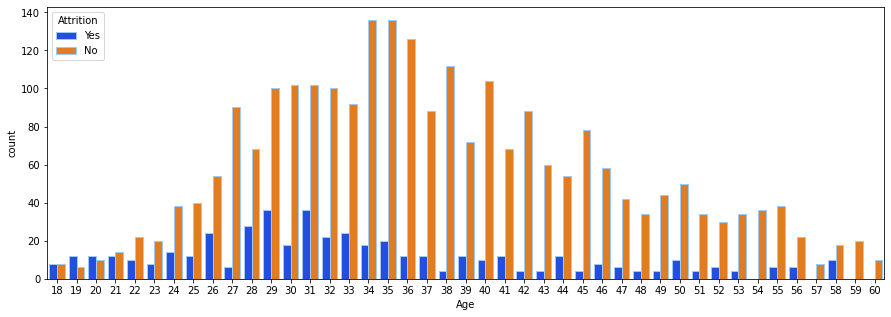

In [8]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)

#ax=axis
sns.countplot(x='Age', hue='Attrition', data = dataset, palette="bright", ax = ax,  edgecolor=sns.color_palette("pastel", n_colors = 1))
plt.show()

In [9]:
dataset.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [10]:
categorical  =[ var for var in dataset.columns if dataset[var].dtype == 'O']
print(categorical)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [11]:
categorical.__len__()

9

In [12]:
dataset[categorical].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


### Vizualization of Categorical Data Over Attrition

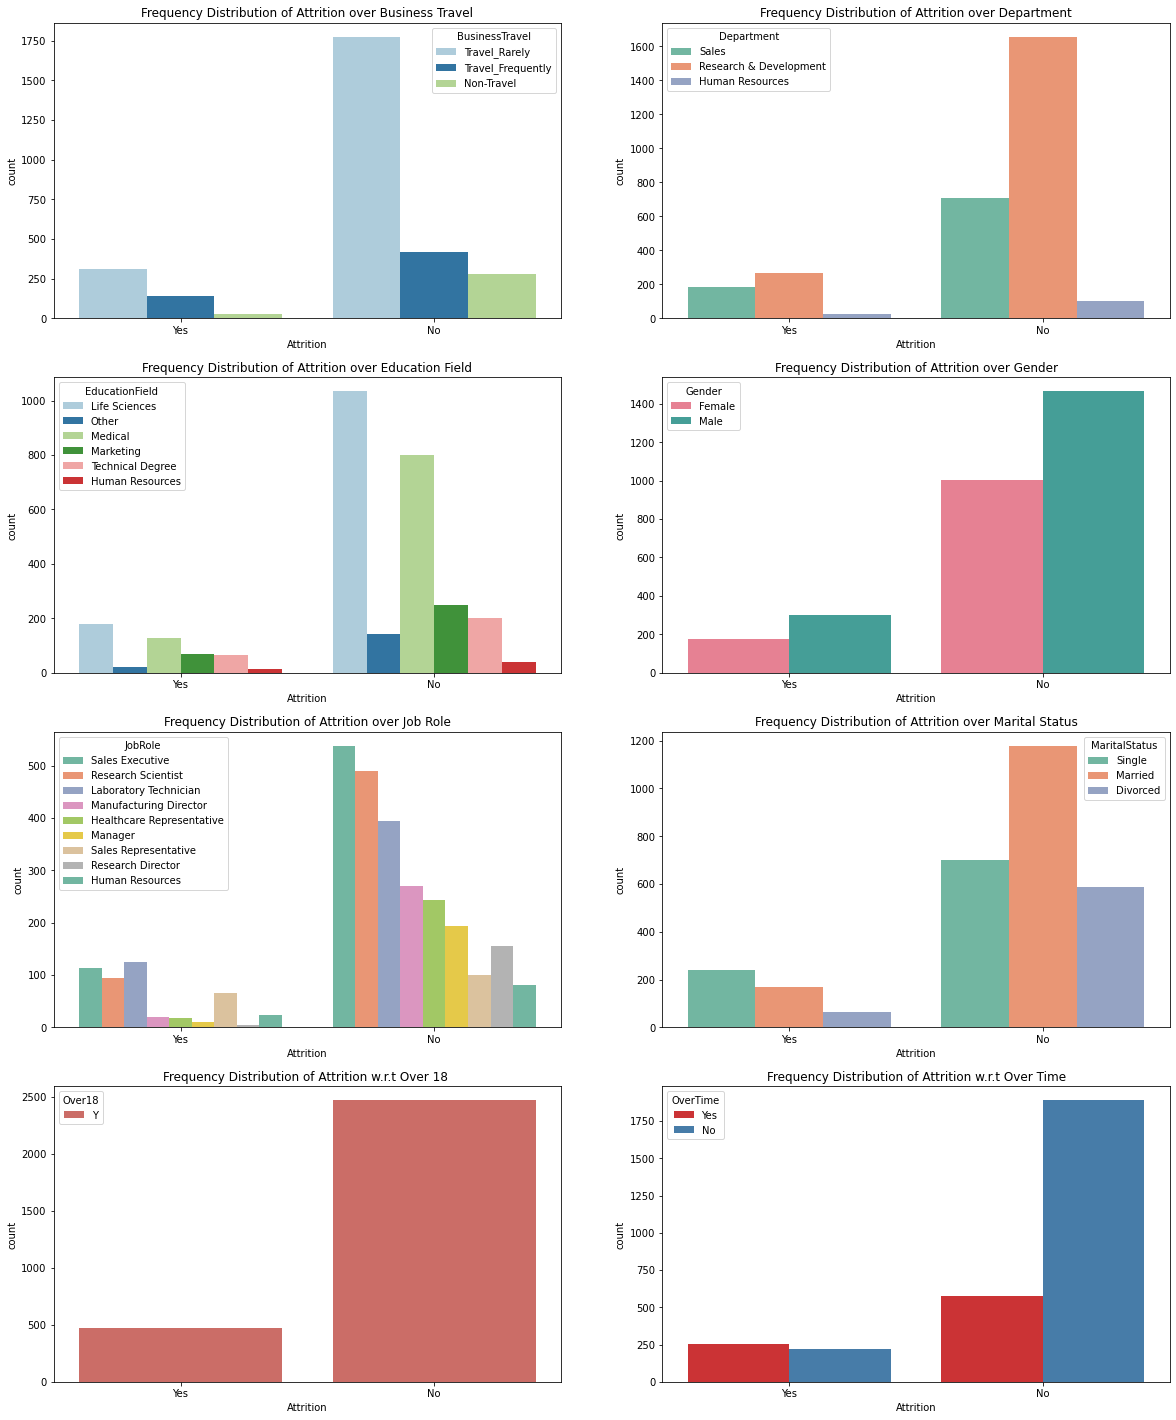

In [13]:
f,ax = plt.subplots(4,2, figsize=(20,25) )
ax[0,0] = sns.countplot(x='Attrition',hue='BusinessTravel', data=dataset,ax=ax[0,0], palette='Paired')
ax[0,0].set_title("Frequency Distribution of Attrition over Business Travel")

ax[0,1] = sns.countplot(x='Attrition',hue='Department', data=dataset,ax=ax[0,1], palette='Set2')
ax[0,1].set_title("Frequency Distribution of Attrition over Department")

ax[1,0] = sns.countplot(x='Attrition',hue='EducationField', data=dataset,ax=ax[1,0], palette='Paired')
ax[1,0].set_title("Frequency Distribution of Attrition over Education Field")

ax[1,1] = sns.countplot(x='Attrition',hue='Gender', data=dataset,ax=ax[1,1], palette="husl")
ax[1,1].set_title("Frequency Distribution of Attrition over Gender")

ax[2,0] = sns.countplot(x='Attrition',hue='JobRole', data=dataset,ax=ax[2,0], palette='Set2')
ax[2,0].set_title("Frequency Distribution of Attrition over Job Role")

ax[2,1] = sns.countplot(x='Attrition',hue='MaritalStatus', data=dataset,ax=ax[2,1], palette='Set2')
ax[2,1].set_title("Frequency Distribution of Attrition over Marital Status")

ax[3,0] = sns.countplot(x='Attrition',hue='Over18', data=dataset,ax=ax[3,0], palette='hls')
ax[3,0].set_title("Frequency Distribution of Attrition w.r.t Over 18 ")

ax[3,1] = sns.countplot(x='Attrition',hue='OverTime', data=dataset,ax=ax[3,1], palette='Set1')
ax[3,1].set_title("Frequency Distribution of Attrition w.r.t Over Time")
plt.show()

### Removing Unwanted columns

In [14]:
x= dataset.drop(columns=['Attrition','EmployeeNumber','EmployeeCount','Over18','StandardHours'],axis=1)

In [15]:
y= dataset['Attrition']

### Columns needed

In [16]:
x.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [17]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
2935     No
2936     No
2937     No
2938     No
2939     No
Name: Attrition, Length: 2940, dtype: object

## Training and Testing

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10 , random_state=42)

In [19]:
print(x_train.shape, x_test.shape)

(2646, 30) (294, 30)


### Ordinal Encoding

In [20]:
encoder = ce.OrdinalEncoder(cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.fit_transform(x_test)


In [21]:
cols = x_train.columns
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train = pd.DataFrame(x_train, columns= [cols])
x_test = pd.DataFrame(x_test, columns=[cols])


In [22]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

### Accuracy Score

In [23]:
score = accuracy_score(y_test, y_pred)
print('Accuracy of the Model is :', np.abs(score)*100)

Accuracy of the Model is : 96.25850340136054
